# 07 Modelling-Multiple linear Regression


---

# Contents

- [1.0 About Prophet Model](#1.0-About-Prophet-Model)
- [2.0 Load Data](#2.0-Load-Data)
- [3.0 Model](#3.0-Model)
    - [3.1 Train/Test Split](#3.1-Train/Test-Split)
    - [3.2 Fit Model](#3.2-Fit-Model)
    - [3.3 Calculate Results](#3.3-Calculate-Results)
    - [3.4 Run Model](#3.4-Run-Model)
- [4.0 Results](#4.0-Results)
- [5.0 Observations](#5.0-Observations)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight') 
%matplotlib inline
import datetime
import calendar

from sklearn.metrics import r2_score, mean_squared_error
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

#Import basic packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from statsmodels.tools.eval_measures import rmse


In [2]:
pd.set_option('display.max_columns', None)

---

# 1.0  Model

About Prophet

More About Prophet

---

# 2.0 Load Data

## 2.1 EUR/USD Data

In [3]:
# read in the daily data
daily = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/resampled/eur-usddailyMarubozu.csv', 
                    index_col='date', parse_dates=True)

In [4]:
daily.head()

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu+1,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,exit_price,select,target,date+5
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-14,0.9353,0.9389,0.9318,0.9383,0.93680,0.94522,0.948145,0.003250,0.003387,-0.016431,-0.014102,-0.017514,0.0030,0.0062,0.0086,0.0041,1.0,97.4,122.0,0,0.0,-1.0,-1.0,0.9416,0.9503,0.9545,0.9425,0.9517,0.9569,0.9330,0.9396,0.9496,0.9354,0.9417,0.9504,0.9382,0.9402,0.9342,0.9360,0.9368,0.9227,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9413,0,0.9402,2000-07-21
2000-07-17,0.9382,0.9402,0.9342,0.9360,0.93710,0.94217,0.947100,0.004282,0.003440,-0.009408,-0.016013,-0.014875,0.0022,0.0030,0.0062,0.0086,-1.0,98.1,123.3,0,-1.0,0.0,-1.0,0.9353,0.9416,0.9503,0.9389,0.9425,0.9517,0.9318,0.9330,0.9396,0.9383,0.9354,0.9417,0.9361,0.9368,0.9227,0.9256,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9338,0,0.9193,2000-07-24
2000-07-18,0.9361,0.9368,0.9227,0.9256,0.93085,0.93785,0.945633,0.003582,0.003797,-0.008151,-0.022678,-0.020519,0.0105,0.0022,0.0030,0.0062,-1.0,98.3,123.8,-1,0.0,0.0,0.0,0.9382,0.9353,0.9416,0.9402,0.9389,0.9425,0.9342,0.9318,0.9330,0.9360,0.9383,0.9354,0.9255,0.9270,0.9193,0.9246,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9151,0,0.9193,2000-07-25
2000-07-19,0.9255,0.9270,0.9193,0.9246,0.92505,0.93366,0.944207,0.003915,0.003618,-0.012543,-0.022146,-0.029125,0.0009,0.0105,0.0022,0.0030,-1.0,97.0,123.3,0,1.0,-1.0,0.0,0.9361,0.9382,0.9353,0.9368,0.9402,0.9389,0.9227,0.9342,0.9318,0.9256,0.9360,0.9383,0.9245,0.9342,0.9204,0.9325,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9237,0,0.9204,2000-07-26
2000-07-20,0.9245,0.9342,0.9204,0.9325,0.92850,0.93166,0.943221,0.005881,0.004167,-0.009177,-0.010655,-0.024531,0.0080,0.0009,0.0105,0.0022,1.0,97.1,123.3,1,0.0,0.0,-1.0,0.9255,0.9361,0.9382,0.9270,0.9368,0.9402,0.9193,0.9227,0.9342,0.9246,0.9256,0.9360,0.9324,0.9384,0.9319,0.9365,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.9405,0,0.9450,2000-07-27


In [5]:
# for count in range(4,16):
#     daily['day-' + str(count) +'_mid'] = daily['mid'].shift(count)
#     daily['day-' + str(count) +'_height'] = daily['height'].shift(count)

In [6]:
daily.head(20)

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu+1,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,exit_price,select,target,date+5
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-14,0.9353,0.9389,0.9318,0.9383,0.93680,0.94522,0.948145,0.003250,0.003387,-0.016431,-0.014102,-0.017514,0.0030,0.0062,0.0086,0.0041,1.0,97.4,122.0,0,0.0,-1.0,-1.0,0.9416,0.9503,0.9545,0.9425,0.9517,0.9569,0.9330,0.9396,0.9496,0.9354,0.9417,0.9504,0.9382,0.9402,0.9342,0.9360,0.9368,0.9227,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9413,0,0.9402,2000-07-21
2000-07-17,0.9382,0.9402,0.9342,0.9360,0.93710,0.94217,0.947100,0.004282,0.003440,-0.009408,-0.016013,-0.014875,0.0022,0.0030,0.0062,0.0086,-1.0,98.1,123.3,0,-1.0,0.0,-1.0,0.9353,0.9416,0.9503,0.9389,0.9425,0.9517,0.9318,0.9330,0.9396,0.9383,0.9354,0.9417,0.9361,0.9368,0.9227,0.9256,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9338,0,0.9193,2000-07-24
2000-07-18,0.9361,0.9368,0.9227,0.9256,0.93085,0.93785,0.945633,0.003582,0.003797,-0.008151,-0.022678,-0.020519,0.0105,0.0022,0.0030,0.0062,-1.0,98.3,123.8,-1,0.0,0.0,0.0,0.9382,0.9353,0.9416,0.9402,0.9389,0.9425,0.9342,0.9318,0.9330,0.9360,0.9383,0.9354,0.9255,0.9270,0.9193,0.9246,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9151,0,0.9193,2000-07-25
2000-07-19,0.9255,0.9270,0.9193,0.9246,0.92505,0.93366,0.944207,0.003915,0.003618,-0.012543,-0.022146,-0.029125,0.0009,0.0105,0.0022,0.0030,-1.0,97.0,123.3,0,1.0,-1.0,0.0,0.9361,0.9382,0.9353,0.9368,0.9402,0.9389,0.9227,0.9342,0.9318,0.9256,0.9360,0.9383,0.9245,0.9342,0.9204,0.9325,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9237,0,0.9204,2000-07-26
2000-07-20,0.9245,0.9342,0.9204,0.9325,0.92850,0.93166,0.943221,0.005881,0.004167,-0.009177,-0.010655,-0.024531,0.0080,0.0009,0.0105,0.0022,1.0,97.1,123.3,1,0.0,0.0,-1.0,0.9255,0.9361,0.9382,0.9270,0.9368,0.9402,0.9193,0.9227,0.9342,0.9246,0.9256,0.9360,0.9324,0.9384,0.9319,0.9365,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.9405,0,0.9450,2000-07-27
2000-07-21,0.9324,0.9384,0.9319,0.9365,0.93445,0.93119,0.942879,0.006660,0.005033,0.003867,-0.002509,-0.016575,0.0041,0.0080,0.0009,0.0105,1.0,97.1,122.2,0,0.0,1.0,0.0,0.9245,0.9255,0.9361,0.9342,0.9270,0.9368,0.9204,0.9193,0.9227,0.9325,0.9246,0.9256,0.9366,0.9367,0.9313,0.9330,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.9338,0.9229,0.9406,0,0.9450,2000-07-28
2000-07-24,0.9366,0.9367,0.9313,0.9330,0.93480,0.93073,0.942807,0.003023,0.004904,0.010540,-0.002454,-0.018428,0.0036,0.0041,0.0080,0.0009,-1.0,97.2,122.3,0,1.0,0.0,1.0,0.9324,0.9245,0.9255,0.9384,0.9342,0.9270,0.9319,0.9204,0.9193,0.9365,0.9325,0.9246,0.9329,0.9433,0.9329,0.9412,0.9450,0.9391,0.9444,0.9314,0.9338,0.9229,0.9295,0.9224,0.9294,0,0.9224,2000-07-31
2000-07-25,0.9329,0.9433,0.9329,0.9412,0.93705,0.93197,0.942790,0.003070,0.005057,0.009208,0.006661,-0.016169,0.0083,0.0036,0.0041,0.0080,1.0,97.2,121.2,1,0.0,0.0,0.0,0.9366,0.9324,0.9245,0.9367,0.9384,0.9342,0.9313,0.9319,0.9204,0.9330,0.9365,0.9325,0.9411,0.9450,0.9391,0.9435,0.9444,0.9314,0.9338,0.9229,0.9295,0.9224,0.9293,0.9135,0.9495,0,0.9450,2000-08-01
2000-07-26,0.9411,0.9450,0.9391,0.9435,0.94230,0.93542,0.942795,0.002636,0.005168,0.008401,0.018648,-0.003911,0.0024,0.0083,0.0036,0.0041,1.0,97.1,121.0,0,-1.0,1.0,0.0,0.9329,0.9366,0.9324,0.9433,0.9367,0.9384,0.9329,0.9313,0.9319,0.9412,0.9330,0.9365,0.9434,0.9444,0.9314,0.9319,0.9338,0.9229,0.9295,0.9224,0.9293,0.9135,0.9192,0.9117,0.9459,0,0.9444,2000-08-02


In [7]:
daily.shape

(4612, 51)

In [8]:
daily.dropna(inplace=True)

In [9]:
daily.shape

(4612, 51)

In [10]:
strat_res_mb = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/model_results/arima_results_mb.csv', parse_dates=True)

In [11]:
strat_res_mb.tail(20)

,name,strategy,date,time_frame,RMSE,MSE,classification
44,arima-0-1-0,marubozu,2012-12-05,daily,0.015200,0.000231,fn
45,arima-0-1-0,marubozu,2013-05-23,daily,0.003633,0.000013,tp
46,arima-0-1-0,marubozu,2013-08-02,daily,0.003621,0.000013,tp
47,arima-0-1-0,marubozu,2014-09-19,daily,0.012922,0.000167,fn
48,arima-0-1-0,marubozu,2014-12-11,daily,0.008296,0.000069,fn
49,arima-0-1-0,marubozu,2015-02-05,daily,0.015147,0.000229,tn
50,arima-0-1-0,marubozu,2015-06-29,daily,0.017357,0.000301,tn
51,arima-0-1-0,marubozu,2016-01-06,daily,0.008007,0.000064,fn
52,arima-0-1-0,marubozu,2016-01-20,daily,0.009116,0.000083,fn
53,arima-0-1-0,marubozu,2016-08-22,daily,0.009183,0.000084,fp


In [12]:
len(strat_res_mb)

64

In [13]:
# Create features dataset

In [14]:
#     # insert the signal to dataset
#     train_test.insert(0, 'signal', model_info['signal'])

#     # create start and end points for the test/train splits
#     model_info['start'] = len(train_test)-5
#     model_info['end'] = len(train_test)-1

In [15]:
daily_pattern = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/patterns/dailyMarubozu.csv', 
                           parse_dates=True)
daily_pattern.head()

,pattern_end
0,2000-10-11
1,2000-10-20
2,2001-04-05
3,2001-04-09
4,2001-08-20


In [16]:
features = daily[daily.index.isin(daily_pattern['pattern_end'])]
features.shape
#df[df.index.isin(my_list)]

(64, 51)

In [18]:
features = features[features.index.isin(strat_res_mb['date'])]
features.shape

(64, 51)

In [19]:
results_series = list(strat_res_mb['classification'])
features['ml_signal'] = results_series
features


,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu+1,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,exit_price,select,target,date+5,ml_signal
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-10-11,0.87330,0.87640,0.86440,0.86770,0.870500,0.870460,0.869214,0.001513,0.001716,0.000632,-0.006392,-0.014491,0.00560,0.00530,0.00190,0.00030,-1.0,94.8,127.4,-1,0.0,1.0,0.0,0.86790,0.86990,0.87010,0.87470,0.87100,0.87430,0.86700,0.86650,0.86740,0.87320,0.86800,0.86980,0.86760,0.86820,0.85970,0.86280,0.86600,0.85300,0.85570,0.84620,0.85650,0.84800,0.85790,0.83270,0.86210,1,0.83270,2000-10-18,tp
2000-10-20,0.84710,0.84750,0.83510,0.84010,0.843600,0.847740,0.867864,0.002844,0.003502,-0.009801,-0.017985,-0.030289,0.00700,0.00710,0.01460,0.00530,-1.0,94.0,131.8,-1,0.0,1.0,-1.0,0.84010,0.85460,0.84930,0.84870,0.85790,0.85650,0.83830,0.83270,0.84800,0.84720,0.84000,0.85460,0.84020,0.84260,0.83450,0.83670,0.84000,0.83490,0.83890,0.82490,0.83250,0.82290,0.84460,0.82900,0.83310,1,0.82290,2000-10-27,tp
2001-04-05,0.90660,0.90910,0.89430,0.89670,0.901650,0.890360,0.901571,0.007044,0.006930,0.024369,0.020832,0.010988,0.00990,0.01000,0.01380,0.00540,-1.0,89.7,117.5,-1,1.0,1.0,1.0,0.89660,0.88290,0.87750,0.90800,0.89870,0.88370,0.89370,0.88210,0.87450,0.90660,0.89670,0.88290,0.89660,0.90510,0.89270,0.90340,0.90510,0.89470,0.89950,0.88680,0.89180,0.88140,0.89460,0.88400,0.88680,1,0.88140,2001-04-12,tp
2001-04-09,0.90350,0.90510,0.89470,0.89650,0.900000,0.898610,0.898467,0.001073,0.006785,-0.001775,0.022495,0.006937,0.00700,0.00680,0.00990,0.01000,-1.0,90.0,117.2,-1,-1.0,1.0,-1.0,0.89660,0.90660,0.89660,0.90510,0.90910,0.90800,0.89270,0.89430,0.89370,0.90340,0.89670,0.90660,0.89640,0.89950,0.88680,0.88980,0.89180,0.88140,0.89460,0.88400,0.89330,0.88910,0.88950,0.88340,0.88950,1,0.88140,2001-04-16,tp
2001-08-20,0.91780,0.92050,0.91130,0.91260,0.915200,0.911100,0.887862,0.002255,0.003879,0.005714,0.021771,0.039350,0.00520,0.00530,0.00310,0.01100,-1.0,96.1,123.7,-1,0.0,1.0,0.0,0.91240,0.91560,0.90450,0.91840,0.92030,0.91710,0.91050,0.90930,0.90340,0.91770,0.91250,0.91550,0.91250,0.91850,0.90820,0.91680,0.92420,0.91230,0.91700,0.91010,0.91690,0.90780,0.91250,0.90870,0.90740,1,0.90780,2001-08-27,tp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-17,1.16361,1.17027,1.16177,1.16953,1.166570,1.163968,1.161323,0.002646,0.002212,0.004663,0.008189,0.005681,0.00592,0.00571,0.00557,0.00515,1.0,417.6,419.5,1,0.0,-1.0,1.0,1.16928,1.16372,1.15858,1.17215,1.17008,1.16493,1.16199,1.16090,1.15698,1.16357,1.16929,1.16373,1.16954,1.17243,1.16520,1.16743,1.17147,1.16500,1.17855,1.16772,1.18025,1.17325,1.18148,1.17240,1.17545,1,1.18148,2018-09-24,tp
2018-10-22,1.15144,1.15499,1.14530,1.14543,1.148435,1.150957,1.157464,0.002761,0.002606,-0.003989,-0.006686,-0.001478,0.00601,0.00569,0.00421,0.00611,-1.0,424.7,434.8,-1,0.0,1.0,0.0,1.14576,1.14997,1.15609,1.15343,1.15273,1.15777,1.14330,1.14494,1.14941,1.15145,1.14576,1.14998,1.14543,1.14932,1.14391,1.14708,1.14762,1.13789,1.14322,1.13560,1.14206,1.13355,1.14163,1.13605,1.13942,1,1.13355,2018-10-29,fn
2018-12-10,1.14282,1.14398,1.13500,1.13690,1.139860,1.137008,1.135899,0.001891,0.002309,0.005385,0.003054,0.005052,0.00592,0.00544,0.00265,0.00191,-1.0,432.7,446.7,-1,0.0,1.0,0.0,1.13737,1.13472,1.13280,1.14425,1.14121,1.13609,1.13602,1.13207,1.13105,1.14281,1.13737,1.13471,1.13690,1.13999,1.13062,1.13261,1.13871,1.13149,1.13932,1.13310,1.13616,1.12696,1.13600,1.1

In [20]:
features.groupby('direction').count()['open']

direction
-1.0    36
 1.0    28
Name: open, dtype: int64

In [21]:
features.groupby('ml_signal').count()

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu+1,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,exit_price,select,target,date+5
ml_signal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fn,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
fp,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
tn,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
tp,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


In [22]:
def convert_signal(row):
    if row['ml_signal'] == 'tp':
        return row['direction']
    else:
        return 0

In [23]:
features['ml_signal'] = features.apply(convert_signal, axis=1)

In [24]:
features.groupby('ml_signal').count()['open']

ml_signal
-1.0     7
 0.0    50
 1.0     7
Name: open, dtype: int64

---

In [25]:
corr_df = features.drop(['marubozu+1','day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
       'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
       'day+5_high', 'day+5_low', 'exit_price', 'select', 'date+5'], axis=1)


In [26]:
corr_df.head()

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,marubozu,marubozu-1,marubozu-2,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,target,ml_signal
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-10-11,0.8733,0.8764,0.8644,0.8677,0.87050,0.87046,0.869214,0.001513,0.001716,0.000632,-0.006392,-0.014491,0.0056,0.0053,0.0019,0.0003,-1.0,94.8,127.4,-1,1.0,0.0,0.8679,0.8699,0.8701,0.8747,0.8710,0.8743,0.8670,0.8665,0.8674,0.8732,0.8680,0.8698,0.8327,-1.0
2000-10-20,0.8471,0.8475,0.8351,0.8401,0.84360,0.84774,0.867864,0.002844,0.003502,-0.009801,-0.017985,-0.030289,0.0070,0.0071,0.0146,0.0053,-1.0,94.0,131.8,-1,1.0,-1.0,0.8401,0.8546,0.8493,0.8487,0.8579,0.8565,0.8383,0.8327,0.8480,0.8472,0.8400,0.8546,0.8229,-1.0
2001-04-05,0.9066,0.9091,0.8943,0.8967,0.90165,0.89036,0.901571,0.007044,0.006930,0.024369,0.020832,0.010988,0.0099,0.0100,0.0138,0.0054,-1.0,89.7,117.5,-1,1.0,1.0,0.8966,0.8829,0.8775,0.9080,0.8987,0.8837,0.8937,0.8821,0.8745,0.9066,0.8967,0.8829,0.8814,-1.0
2001-04-09,0.9035,0.9051,0.8947,0.8965,0.90000,0.89861,0.898467,0.001073,0.006785,-0.001775,0.022495,0.006937,0.0070,0.0068,0.0099,0.0100,-1.0,90.0,117.2,-1,1.0,-1.0,0.8966,0.9066,0.8966,0.9051,0.9091,0.9080,0.8927,0.8943,0.8937,0.9034,0.8967,0.9066,0.8814,-1.0
2001-08-20,0.9178,0.9205,0.9113,0.9126,0.91520,0.91110,0.887862,0.002255,0.003879,0.005714,0.021771,0.039350,0.0052,0.0053,0.0031,0.0110,-1.0,96.1,123.7,-1,1.0,0.0,0.9124,0.9156,0.9045,0.9184,0.9203,0.9171,0.9105,0.9093,0.9034,0.9177,0.9125,0.9155,0.9078,-1.0


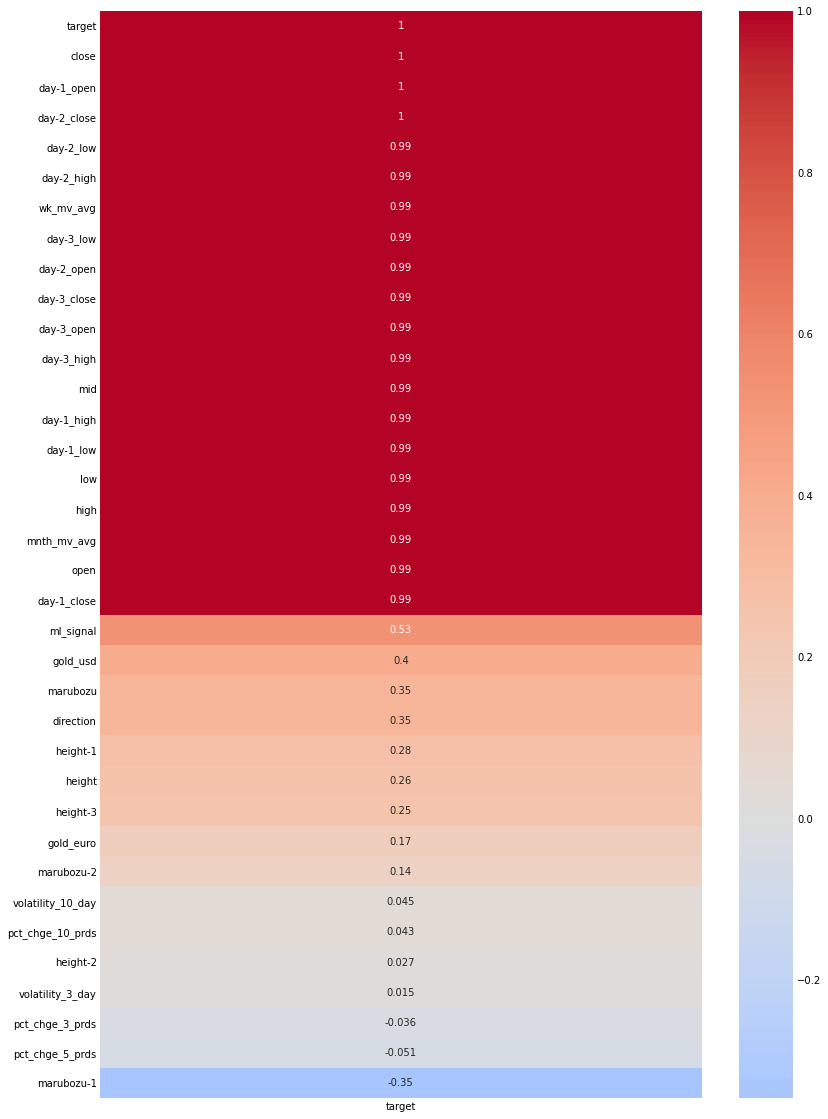

In [27]:
figure = plt.figure(figsize=(12,20))
sns.heatmap(corr_df.corr()[['target']].sort_values('target',ascending=False),annot=True, cmap='coolwarm', center=0);

A lot of the features are highly correlated - I will leave them in a let ridge and lasso penalties remove the unecessary featues. I will then go back and remove my own features. 

---

## 3.1 Train/Test Split

In [28]:
## Features and scaling

In [29]:
features.columns

Index(['open', 'high', 'low', 'close', 'mid', 'wk_mv_avg', 'mnth_mv_avg',
       'volatility_3_day', 'volatility_10_day', 'pct_chge_3_prds',
       'pct_chge_5_prds', 'pct_chge_10_prds', 'height', 'height-1', 'height-2',
       'height-3', 'direction', 'gold_usd', 'gold_euro', 'marubozu',
       'marubozu+1', 'marubozu-1', 'marubozu-2', 'day-1_open', 'day-2_open',
       'day-3_open', 'day-1_high', 'day-2_high', 'day-3_high', 'day-1_low',
       'day-2_low', 'day-3_low', 'day-1_close', 'day-2_close', 'day-3_close',
       'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
       'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
       'day+5_high', 'day+5_low', 'exit_price', 'select', 'target', 'date+5',
       'ml_signal'],
      dtype='object')

In [30]:
# features_df = features.drop(['marubozu+1','day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
#        'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
#        'day+5_high', 'day+5_low', 'exit_price', 'select', 'date+5','target'], axis=1)
features_df = features.drop(['height-1', 'height-2',
       'height-3', 'marubozu',
       'marubozu+1', 'marubozu-1', 'marubozu-2', 'day-1_open', 'day-2_open',
       'day-3_open', 'day-1_high', 'day-2_high', 'day-3_high', 'day-1_low',
       'day-2_low', 'day-3_low', 'day-1_close', 'day-2_close', 'day-3_close',
       'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
       'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
       'day+5_high', 'day+5_low', 'exit_price', 'select', 'target', 'date+5'], axis=1)

In [31]:
X = features_df
y = features['target']

In [32]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=15)

#Standardize data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# 3.0 Model

In [33]:
#I instantiate the various models
lr = LinearRegression()

lasso = LassoCV(n_alphas=200)

ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

enet = ElasticNetCV(l1_ratio=np.linspace(0.001, 1, 50), n_alphas = 100)

In [34]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.9955833769501027

In [35]:
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
lasso_scores.mean()

0.994823106651266

In [36]:
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
ridge_scores.mean()

0.9951963106202358

In [37]:
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=5)
enet_scores.mean()

0.9948610161084593

Enet was best

In [38]:
enet.fit(X_train_ss, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.4...
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [39]:
enet.score(X_train_ss, y_train)

0.9973777755480328

In [40]:
enet.score(X_test_ss, y_test)

0.9933414784502105

In [47]:
yhat = enet.predict(X_test_ss)
r2_score(y_test, yhat)

0.9933414784502105

In [48]:
mse = (mean_squared_error(y_test, yhat))
print("The root mean squared error of the model is " + str(rmse))

The root mean squared error of the model is <function rmse at 0x7fd221f2d050>


In [49]:
residuals = y_test - yhat

In [50]:
yhat

array([1.08155869, 1.19005796, 1.1259123 , 1.37210045, 1.52305004,
       1.44708486, 1.26074576, 1.14812386, 1.28538117, 1.1360236 ,
       1.04956863, 1.13634488, 1.14908926, 1.15397475, 1.4036448 ,
       1.18888975])

Text(0.5, 0, 'Predictions')

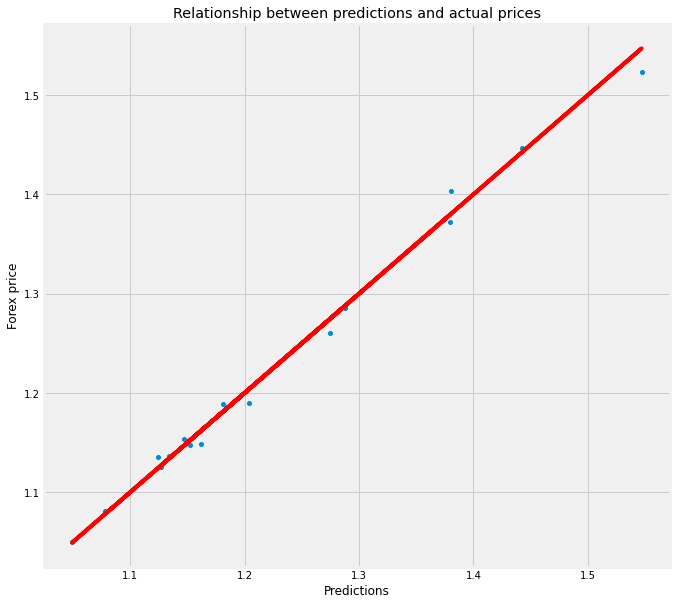

In [51]:
# Plot to show the correlation between prediction and value.
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(y_test, yhat);
ax.plot(y_test.min(), y_test.max(),
        y_test, y_test, color='r');
plt.title("Relationship between predictions and actual prices") 
plt.ylabel("Forex price")
plt.xlabel("Predictions") 

Text(0.5, 0, 'Predictions')

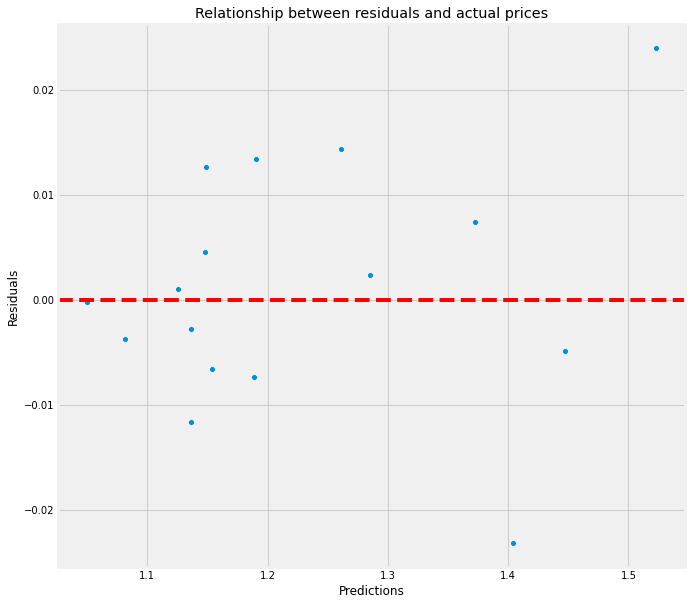

In [52]:
#plt.scatter(yhat, residuals);

f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(yhat, residuals);
ax.axhline(0, ls='--', color='r')
plt.title("Relationship between residuals and actual prices") 
plt.ylabel("Residuals")
plt.xlabel("Predictions")

## 3.2 Fit Model

In [53]:
## Interpretation

In [54]:
model_coefs = pd.DataFrame(enet.coef_, index=X.columns)

model_coefs.rename(columns={0:'coef'}, inplace=True)
model_coefs.reset_index(inplace=True)
model_coefs.sort_values('coef',ascending=False, inplace=True)
model_coefs.rename(columns={'index':'feature'}, inplace=True)
model_coefs

,feature,coef
0,open,0.108149
1,high,0.036152
3,close,0.020952
13,direction,0.017402
11,pct_chge_10_prds,0.004407
16,ml_signal,0.004174
12,height,0.001287
15,gold_euro,0.000613
6,mnth_mv_avg,0.000000
5,wk_mv_avg,0.000000


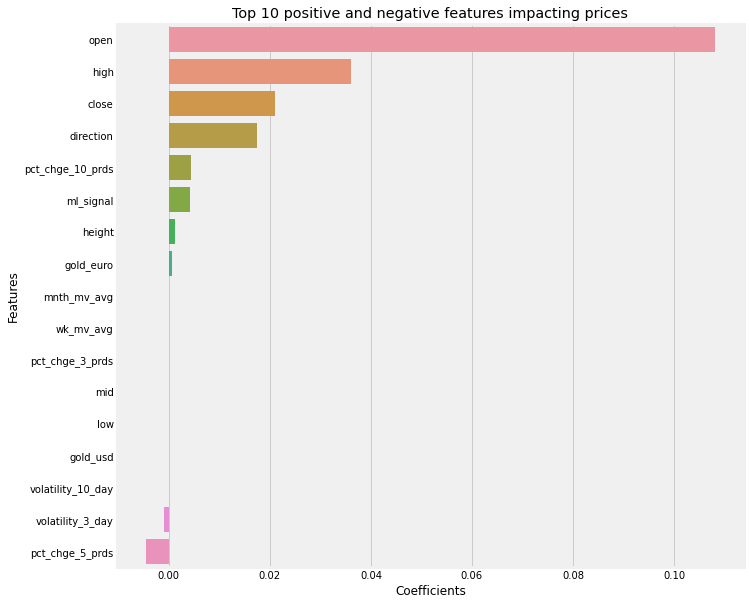

In [55]:
# Plot the graph to show top and bottom features.

f, ax = plt.subplots(figsize=(10,10))
sns.barplot(model_coefs['coef'],model_coefs['feature']);
plt.title("Top 10 positive and negative features impacting prices") 
plt.ylabel("Features")
plt.xlabel("Coefficients") ;

In [56]:
yhat

array([1.08155869, 1.19005796, 1.1259123 , 1.37210045, 1.52305004,
       1.44708486, 1.26074576, 1.14812386, 1.28538117, 1.1360236 ,
       1.04956863, 1.13634488, 1.14908926, 1.15397475, 1.4036448 ,
       1.18888975])

In [57]:
X_test

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,direction,gold_usd,gold_euro,ml_signal
date,,,,,,,,,,,,,,,,,
2016-01-20,1.09537,1.09758,1.08671,1.08907,1.092220,1.090230,1.089389,0.001440,0.002681,0.003003,0.005769,0.012599,0.00630,-1.0,382.8,412.5,0.0
2006-03-31,1.21590,1.21640,1.20660,1.20720,1.211550,1.206100,1.203398,0.003241,0.003408,0.009289,0.008742,-0.004642,0.00870,-1.0,202.2,196.2,0.0
2018-12-10,1.14282,1.14398,1.13500,1.13690,1.139860,1.137008,1.135899,0.001891,0.002309,0.005385,0.003054,0.005052,0.00592,-1.0,432.7,446.7,0.0
2010-03-05,1.35890,1.36900,1.35290,1.36770,1.363300,1.361580,1.362983,0.003823,0.003905,0.003607,0.002832,0.005421,0.00880,1.0,394.4,340.3,0.0
2008-06-19,1.55700,1.55880,1.54680,1.55130,1.554150,1.549850,1.557593,0.001652,0.005661,0.004849,0.004524,0.003357,0.00570,-1.0,313.8,237.9,0.0
2011-05-10,1.43320,1.44220,1.42700,1.43990,1.436550,1.454590,1.456655,0.008005,0.007549,-0.022888,-0.029260,-0.016668,0.00670,1.0,525.9,430.2,0.0
2006-08-02,1.28300,1.28300,1.27430,1.27550,1.279250,1.275550,1.269112,0.001238,0.002571,0.004870,0.011225,0.018795,0.00750,-1.0,227.4,208.4,0.0
2018-06-26,1.17097,1.17187,1.16348,1.16594,1.168455,1.163187,1.167793,0.002247,0.004682,0.008297,0.006664,-0.005947,0.00503,-1.0,437.9,440.8,0.0
2012-01-09,1.26941,1.27846,1.26929,1.27799,1.273700,1.286257,1.299754,0.005382,0.004552,-0.018657,-0.016858,-0.025154,0.00858,1.0,561.2,517.3,0.0


In [58]:
## Confusion Matrix

In [59]:
final_res_enet = X_test
final_res_enet['yhat'] = yhat
final_res_enet

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,direction,gold_usd,gold_euro,ml_signal,yhat
date,,,,,,,,,,,,,,,,,,
2016-01-20,1.09537,1.09758,1.08671,1.08907,1.092220,1.090230,1.089389,0.001440,0.002681,0.003003,0.005769,0.012599,0.00630,-1.0,382.8,412.5,0.0,1.081559
2006-03-31,1.21590,1.21640,1.20660,1.20720,1.211550,1.206100,1.203398,0.003241,0.003408,0.009289,0.008742,-0.004642,0.00870,-1.0,202.2,196.2,0.0,1.190058
2018-12-10,1.14282,1.14398,1.13500,1.13690,1.139860,1.137008,1.135899,0.001891,0.002309,0.005385,0.003054,0.005052,0.00592,-1.0,432.7,446.7,0.0,1.125912
2010-03-05,1.35890,1.36900,1.35290,1.36770,1.363300,1.361580,1.362983,0.003823,0.003905,0.003607,0.002832,0.005421,0.00880,1.0,394.4,340.3,0.0,1.372100
2008-06-19,1.55700,1.55880,1.54680,1.55130,1.554150,1.549850,1.557593,0.001652,0.005661,0.004849,0.004524,0.003357,0.00570,-1.0,313.8,237.9,0.0,1.523050
2011-05-10,1.43320,1.44220,1.42700,1.43990,1.436550,1.454590,1.456655,0.008005,0.007549,-0.022888,-0.029260,-0.016668,0.00670,1.0,525.9,430.2,0.0,1.447085
2006-08-02,1.28300,1.28300,1.27430,1.27550,1.279250,1.275550,1.269112,0.001238,0.002571,0.004870,0.011225,0.018795,0.00750,-1.0,227.4,208.4,0.0,1.260746
2018-06-26,1.17097,1.17187,1.16348,1.16594,1.168455,1.163187,1.167793,0.002247,0.004682,0.008297,0.006664,-0.005947,0.00503,-1.0,437.9,440.8,0.0,1.148124
2012-01-09,1.26941,1.27846,1.26929,1.27799,1.273700,1.286257,1.299754,0.005382,0.004552,-0.018657,-0.016858,-0.025154,0.00858,1.0,561.2,517.3,0.0,1.285381


In [60]:
yhat

array([1.08155869, 1.19005796, 1.1259123 , 1.37210045, 1.52305004,
       1.44708486, 1.26074576, 1.14812386, 1.28538117, 1.1360236 ,
       1.04956863, 1.13634488, 1.14908926, 1.15397475, 1.4036448 ,
       1.18888975])

In [61]:
final_res_enet.sort_index(inplace=True)
final_res_enet[['open','high','low','close','yhat']].head()

,open,high,low,close,yhat
date,,,,,
2006-03-31,1.2159,1.2164,1.2066,1.2072,1.190058
2006-08-02,1.2830,1.2830,1.2743,1.2755,1.260746
2008-06-19,1.5570,1.5588,1.5468,1.5513,1.523050
2009-06-03,1.4304,1.4338,1.4109,1.4168,1.403645
2010-03-05,1.3589,1.3690,1.3529,1.3677,1.372100


In [62]:
result_dates = final_res_enet.index

In [63]:
prepare_res = features.drop(['ml_signal','mid','wk_mv_avg', 'mnth_mv_avg',
       'volatility_3_day', 'volatility_10_day', 'pct_chge_3_prds',
       'pct_chge_5_prds', 'pct_chge_10_prds', 'height-1', 'height-2',
       'height-3', 'gold_usd', 'gold_euro', 'marubozu',
       'marubozu+1', 'marubozu-1', 'marubozu-2', 'day-1_open', 'day-2_open',
       'day-3_open', 'day-1_high', 'day-2_high', 'day-3_high', 'day-1_low',
       'day-2_low', 'day-3_low', 'day-1_close', 'day-2_close', 'day-3_close',
       'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
       'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
       'day+5_high', 'day+5_low', 'select', 'date+5'], axis=1)

In [64]:
create_cm_df = prepare_res.loc[prepare_res.index.isin(result_dates)]
create_cm_df;

In [65]:
create_cm_df['yhat'] = final_res_enet[['yhat']]
create_cm_df.rename(columns={'exit_price':'threshold','target':'actual_best'}, inplace=True)

# X_test['exit_price'] = 
#exit_price

In [66]:
def classify_row(row):
    
    if row['direction'] == -1:
        if row['actual_best'] <= row['threshold']:
            return 1
        else:
            return 0
    elif row['direction'] == 1:
        if row['actual_best'] >= row['threshold']:
            return 1
        else:
            return 0

In [67]:
def classify_mlr(row):
    
    if row['direction'] == -1:
        if row['yhat'] <= row['threshold']:
            return 1
        else:
            return 0
    elif row['direction'] == 1:
        if row['yhat'] >= row['threshold']:
            return 1
        else:
            return 0

In [68]:
create_cm_df['correct_decision'] = create_cm_df.apply(classify_row, axis=1)

In [69]:
create_cm_df['ml_decision'] = create_cm_df.apply(classify_mlr, axis=1)

In [70]:
create_cm_df

,open,high,low,close,height,direction,threshold,actual_best,yhat,correct_decision,ml_decision
date,,,,,,,,,,,
2006-03-31,1.21590,1.21640,1.20660,1.20720,0.00870,-1.0,1.19850,1.20350,1.190058,0,1
2006-08-02,1.28300,1.28300,1.27430,1.27550,0.00750,-1.0,1.26800,1.27510,1.260746,0,1
2008-06-19,1.55700,1.55880,1.54680,1.55130,0.00570,-1.0,1.54560,1.54700,1.523050,0,1
2009-06-03,1.43040,1.43380,1.41090,1.41680,0.01360,-1.0,1.40320,1.38050,1.403645,1,0
2010-03-05,1.35890,1.36900,1.35290,1.36770,0.00880,1.0,1.37650,1.37950,1.372100,1,0
2011-05-10,1.43320,1.44220,1.42700,1.43990,0.00670,1.0,1.44660,1.44220,1.447085,0,1
2012-01-09,1.26941,1.27846,1.26929,1.27799,0.00858,1.0,1.28657,1.28776,1.285381,1,0
2015-02-05,1.13530,1.14987,1.13314,1.14704,0.01174,1.0,1.15878,1.14734,1.153975,0,0
2015-06-29,1.10145,1.12785,1.09850,1.11901,0.01756,1.0,1.13657,1.12440,1.136024,0,0


In [71]:
def clasify_cm(row):
    if row['correct_decision'] == 1 and row['ml_decision'] ==1:
        return 'tp'
    elif row['correct_decision'] == 0 and row['ml_decision'] == 0:
        return 'tn'
    elif row['correct_decision'] == 0 and row['ml_decision'] == 1:
        return 'fp'
    elif row['correct_decision'] == 1 and row['ml_decision'] == 0:
        return 'fn'

In [72]:
create_cm_df['outcome'] = create_cm_df.apply(clasify_cm, axis=1)
create_cm_df

,open,high,low,close,height,direction,threshold,actual_best,yhat,correct_decision,ml_decision,outcome
date,,,,,,,,,,,,
2006-03-31,1.21590,1.21640,1.20660,1.20720,0.00870,-1.0,1.19850,1.20350,1.190058,0,1,fp
2006-08-02,1.28300,1.28300,1.27430,1.27550,0.00750,-1.0,1.26800,1.27510,1.260746,0,1,fp
2008-06-19,1.55700,1.55880,1.54680,1.55130,0.00570,-1.0,1.54560,1.54700,1.523050,0,1,fp
2009-06-03,1.43040,1.43380,1.41090,1.41680,0.01360,-1.0,1.40320,1.38050,1.403645,1,0,fn
2010-03-05,1.35890,1.36900,1.35290,1.36770,0.00880,1.0,1.37650,1.37950,1.372100,1,0,fn
2011-05-10,1.43320,1.44220,1.42700,1.43990,0.00670,1.0,1.44660,1.44220,1.447085,0,1,fp
2012-01-09,1.26941,1.27846,1.26929,1.27799,0.00858,1.0,1.28657,1.28776,1.285381,1,0,fn
2015-02-05,1.13530,1.14987,1.13314,1.14704,0.01174,1.0,1.15878,1.14734,1.153975,0,0,tn
2015-06-29,1.10145,1.12785,1.09850,1.11901,0.01756,1.0,1.13657,1.12440,1.136024,0,0,tn


In [73]:
def create_cm(enet_res):
    
    res_cm = [[0,0],
              [0,0]]
    
    for res in enet_res:
        if res == 'tp':
            res_cm[0][0] += 1
        elif res == 'fp':
            res_cm[0][1] += 1
        elif res == 'fn':
            res_cm[1][0] += 1
        elif res == 'tn':
            res_cm[1][1] += 1
    
    return res_cm

In [74]:
cm = create_cm(create_cm_df['outcome'])

In [75]:
cm_df = pd.DataFrame(cm, index=['pred_success', 'pred_non_success'], columns=['actual success', 'actual non_success'])
cm_df

,actual success,actual non_success
pred_success,6,5
pred_non_success,3,2


In [76]:
def print_metrics(cm):
    # Accuracy - how many did the model get right
    # Total number of correct predictions / total number of predictions
    acc= (cm[0][0]+cm[1][1])/(np.sum(cm))
    
    # Precision proportion of positive identifications that were actually correct
    # True positives/ true positives + false positives)
    prec = cm[0][0]/(cm[0][0]+cm[0][1])
    
    # Recall - proportion of actual positives that were correctly defined
    # True positives/ true positives + false negatives
    rec = cm[0][0]/(cm[0][0]+cm[1][0])

    print(f"Accuracy:\t{round(acc,2)}\nPrecision:\t{round(prec,2)}\nRecall:\t\t{round(rec,2)}")


In [77]:
# Display the results
print_metrics(cm)

Accuracy:	0.5
Precision:	0.55
Recall:		0.67


# Fractals

## 2.1 EUR/USD Data

In [158]:
# read in the daily data
daily_fract = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/resampled/eur-usddailyfractals.csv', 
                    index_col='date', parse_dates=True)

In [159]:
daily_fract.head()

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,day-1_high,day-2_high,day-3_high,day-4_high,day-1_low,day-2_low,day-3_low,day-4_low,day-1_open,day-2_open,day-3_open,day-4_open,day-1_close,day-2_close,day-3_close,day-4_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,5_day_avg,fractal_end,day+1_frac,day+2_frac,day+3_frac,day+4_frac,select,exit_price,target,date+5,fractal
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-17,0.9382,0.9402,0.9342,0.9360,0.93710,0.94217,0.947100,0.004282,0.003440,-0.009408,-0.016013,-0.014875,0.0022,0.0030,0.0062,0.0086,0,98.1,123.3,0.9389,0.9425,0.9517,0.9569,0.9318,0.9330,0.9396,0.9496,0.9353,0.9416,0.9503,0.9545,0.9383,0.9354,0.9417,0.9504,0.9361,0.9368,0.9227,0.9256,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.00500,0,0.0,0.0,0.0,-1.0,0,0.93600,0.0000,2000-07-24,0
2000-07-18,0.9361,0.9368,0.9227,0.9256,0.93085,0.93785,0.945633,0.003582,0.003797,-0.008151,-0.022678,-0.020519,0.0105,0.0022,0.0030,0.0062,0,98.3,123.8,0.9402,0.9389,0.9425,0.9517,0.9342,0.9318,0.9330,0.9396,0.9382,0.9353,0.9416,0.9503,0.9360,0.9383,0.9354,0.9417,0.9255,0.9270,0.9193,0.9246,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.00610,0,0.0,0.0,-1.0,0.0,0,0.92560,0.0000,2000-07-25,0
2000-07-19,0.9255,0.9270,0.9193,0.9246,0.92505,0.93366,0.944207,0.003915,0.003618,-0.012543,-0.022146,-0.029125,0.0009,0.0105,0.0022,0.0030,0,97.0,123.3,0.9368,0.9402,0.9389,0.9425,0.9227,0.9342,0.9318,0.9330,0.9361,0.9382,0.9353,0.9416,0.9256,0.9360,0.9383,0.9354,0.9245,0.9342,0.9204,0.9325,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.00500,0,0.0,-1.0,0.0,0.0,0,0.92460,0.0000,2000-07-26,0
2000-07-20,0.9245,0.9342,0.9204,0.9325,0.92850,0.93166,0.943221,0.005881,0.004167,-0.009177,-0.010655,-0.024531,0.0080,0.0009,0.0105,0.0022,0,97.1,123.3,0.9270,0.9368,0.9402,0.9389,0.9193,0.9227,0.9342,0.9318,0.9255,0.9361,0.9382,0.9353,0.9246,0.9256,0.9360,0.9383,0.9324,0.9384,0.9319,0.9365,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.00500,0,-1.0,0.0,0.0,0.0,0,0.93250,0.0000,2000-07-27,0
2000-07-21,0.9324,0.9384,0.9319,0.9365,0.93445,0.93119,0.942879,0.006660,0.005033,0.003867,-0.002509,-0.016575,0.0041,0.0080,0.0009,0.0105,-1,97.1,122.2,0.9342,0.9270,0.9368,0.9402,0.9204,0.9193,0.9227,0.9342,0.9245,0.9255,0.9361,0.9382,0.9325,0.9246,0.9256,0.9360,0.9366,0.9367,0.9313,0.9330,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.9338,0.9229,0.00514,-1,0.0,0.0,0.0,0.0,1,0.93136,0.9229,2000-07-28,0


In [160]:
# for count in range(4,16):
#     daily['day-' + str(count) +'_mid'] = daily['mid'].shift(count)
#     daily['day-' + str(count) +'_height'] = daily['height'].shift(count)

In [161]:
daily_fract.head()

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,day-1_high,day-2_high,day-3_high,day-4_high,day-1_low,day-2_low,day-3_low,day-4_low,day-1_open,day-2_open,day-3_open,day-4_open,day-1_close,day-2_close,day-3_close,day-4_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,5_day_avg,fractal_end,day+1_frac,day+2_frac,day+3_frac,day+4_frac,select,exit_price,target,date+5,fractal
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-17,0.9382,0.9402,0.9342,0.9360,0.93710,0.94217,0.947100,0.004282,0.003440,-0.009408,-0.016013,-0.014875,0.0022,0.0030,0.0062,0.0086,0,98.1,123.3,0.9389,0.9425,0.9517,0.9569,0.9318,0.9330,0.9396,0.9496,0.9353,0.9416,0.9503,0.9545,0.9383,0.9354,0.9417,0.9504,0.9361,0.9368,0.9227,0.9256,0.9270,0.9193,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.00500,0,0.0,0.0,0.0,-1.0,0,0.93600,0.0000,2000-07-24,0
2000-07-18,0.9361,0.9368,0.9227,0.9256,0.93085,0.93785,0.945633,0.003582,0.003797,-0.008151,-0.022678,-0.020519,0.0105,0.0022,0.0030,0.0062,0,98.3,123.8,0.9402,0.9389,0.9425,0.9517,0.9342,0.9318,0.9330,0.9396,0.9382,0.9353,0.9416,0.9503,0.9360,0.9383,0.9354,0.9417,0.9255,0.9270,0.9193,0.9246,0.9342,0.9204,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.00610,0,0.0,0.0,-1.0,0.0,0,0.92560,0.0000,2000-07-25,0
2000-07-19,0.9255,0.9270,0.9193,0.9246,0.92505,0.93366,0.944207,0.003915,0.003618,-0.012543,-0.022146,-0.029125,0.0009,0.0105,0.0022,0.0030,0,97.0,123.3,0.9368,0.9402,0.9389,0.9425,0.9227,0.9342,0.9318,0.9330,0.9361,0.9382,0.9353,0.9416,0.9256,0.9360,0.9383,0.9354,0.9245,0.9342,0.9204,0.9325,0.9384,0.9319,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.00500,0,0.0,-1.0,0.0,0.0,0,0.92460,0.0000,2000-07-26,0
2000-07-20,0.9245,0.9342,0.9204,0.9325,0.92850,0.93166,0.943221,0.005881,0.004167,-0.009177,-0.010655,-0.024531,0.0080,0.0009,0.0105,0.0022,0,97.1,123.3,0.9270,0.9368,0.9402,0.9389,0.9193,0.9227,0.9342,0.9318,0.9255,0.9361,0.9382,0.9353,0.9246,0.9256,0.9360,0.9383,0.9324,0.9384,0.9319,0.9365,0.9367,0.9313,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.00500,0,-1.0,0.0,0.0,0.0,0,0.93250,0.0000,2000-07-27,0
2000-07-21,0.9324,0.9384,0.9319,0.9365,0.93445,0.93119,0.942879,0.006660,0.005033,0.003867,-0.002509,-0.016575,0.0041,0.0080,0.0009,0.0105,-1,97.1,122.2,0.9342,0.9270,0.9368,0.9402,0.9204,0.9193,0.9227,0.9342,0.9245,0.9255,0.9361,0.9382,0.9325,0.9246,0.9256,0.9360,0.9366,0.9367,0.9313,0.9330,0.9433,0.9329,0.9450,0.9391,0.9444,0.9314,0.9338,0.9229,0.00514,-1,0.0,0.0,0.0,0.0,1,0.93136,0.9229,2000-07-28,0


In [162]:
daily_fract.shape

(4632, 58)

In [163]:
daily_fract.dropna(inplace=True)

In [164]:
daily_fract.shape

(4632, 58)

In [165]:
strat_res_fr = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/model_results/arima_results_fr.csv', 
                           parse_dates=True)

In [166]:
strat_res_fr.tail(20)

,name,strategy,date,time_frame,RMSE,MSE,classification
592,arima-0-1-0,fractals,2019-04-30,daily,0.004395,0.000019,fn
593,arima-0-1-0,fractals,2019-05-03,daily,0.001163,0.000001,tp
594,arima-0-1-0,fractals,2019-05-15,daily,0.007075,0.000050,fp
595,arima-0-1-0,fractals,2019-05-28,daily,0.004621,0.000021,tp
596,arima-0-1-0,fractals,2019-06-03,daily,0.005489,0.000030,tp
597,arima-0-1-0,fractals,2019-06-10,daily,0.008497,0.000072,fn
598,arima-0-1-0,fractals,2019-06-14,daily,0.004960,0.000025,tp
599,arima-0-1-0,fractals,2019-06-27,daily,0.009117,0.000083,fp
600,arima-0-1-0,fractals,2019-07-11,daily,0.006277,0.000039,fn
601,arima-0-1-0,fractals,2019-07-29,daily,0.007911,0.000063,fn


In [167]:
len(strat_res_fr)

612

In [168]:
# Create features dataset

In [169]:
#     # insert the signal to dataset
#     train_test.insert(0, 'signal', model_info['signal'])

#     # create start and end points for the test/train splits
#     model_info['start'] = len(train_test)-5
#     model_info['end'] = len(train_test)-1

In [170]:
fractal_pattern = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/patterns/dailyfractals.csv', 
                           parse_dates=True)
fractal_pattern.head()

,pattern_end
0,2000-07-21
1,2000-07-28
2,2000-08-07
3,2000-08-22
4,2000-08-29


In [171]:
features_fr = daily_fract[daily_fract.index.isin(fractal_pattern['pattern_end'])]
features_fr.shape
#df[df.index.isin(my_list)]

(613, 58)

In [172]:
features_fr = features_fr[features_fr.index.isin(strat_res_fr['date'])]
features_fr.shape

(612, 58)

In [173]:
results_series_fr = list(strat_res_fr['classification'])
features_fr['ml_signal'] = results_series_fr
features_fr

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,day-1_high,day-2_high,day-3_high,day-4_high,day-1_low,day-2_low,day-3_low,day-4_low,day-1_open,day-2_open,day-3_open,day-4_open,day-1_close,day-2_close,day-3_close,day-4_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,5_day_avg,fractal_end,day+1_frac,day+2_frac,day+3_frac,day+4_frac,select,exit_price,target,date+5,fractal,ml_signal
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-07-28,0.93200,0.93380,0.92290,0.92410,0.928050,0.935970,0.941517,0.008063,0.005738,-0.009605,-0.006849,-0.009340,0.00790,0.01150,0.00240,0.00830,1,96.6,122.4,0.94440,0.94500,0.94330,0.93670,0.93140,0.93910,0.93290,0.93130,0.94340,0.94110,0.93290,0.93660,0.93190,0.94350,0.94120,0.93300,0.92410,0.92950,0.92240,0.92740,0.92930,0.91350,0.91920,0.91170,0.91740,0.89970,0.91030,0.90150,0.00674,1,0.0,0.0,0.0,0.0,1,0.93084,0.92950,2000-08-04,1,tn
2000-08-07,0.90900,0.91140,0.90550,0.90830,0.908650,0.913070,0.931095,0.004558,0.004815,-0.009052,-0.018472,-0.027974,0.00070,0.00410,0.01170,0.00010,-1,94.9,122.7,0.91030,0.91740,0.91920,0.92930,0.90150,0.89970,0.91170,0.91350,0.90470,0.91670,0.91690,0.92750,0.90880,0.90500,0.91700,0.91680,0.90840,0.90840,0.89820,0.90100,0.90280,0.89650,0.90980,0.90200,0.91450,0.90140,0.90750,0.90070,0.00546,-1,0.0,0.0,0.0,0.0,1,0.90284,0.89650,2000-08-14,0,tp
2000-08-22,0.90240,0.90350,0.89330,0.89360,0.898000,0.909270,0.915057,0.002085,0.005123,-0.019383,-0.014703,-0.007406,0.00880,0.00500,0.00880,0.00130,1,95.0,124.2,0.90790,0.91840,0.91800,0.91770,0.90130,0.90590,0.91190,0.90660,0.90750,0.91640,0.91510,0.91600,0.90250,0.90760,0.91640,0.91520,0.89370,0.90430,0.89120,0.90150,0.90550,0.89860,0.90750,0.89790,0.90450,0.89850,0.90230,0.89160,0.00500,1,0.0,0.0,0.0,0.0,1,0.89860,0.90750,2000-08-29,1,fn
2000-08-29,0.89920,0.90230,0.89160,0.89340,0.896300,0.899580,0.906824,0.003953,0.004445,-0.004609,-0.001893,-0.016568,0.00580,0.00520,0.00490,0.00230,1,95.2,124.7,0.90450,0.90750,0.90550,0.90430,0.89850,0.89790,0.89860,0.89120,0.90430,0.89940,0.90160,0.89370,0.89910,0.90430,0.89930,0.90150,0.89330,0.89590,0.88720,0.89450,0.89750,0.88410,0.90240,0.88770,0.90400,0.89700,0.89810,0.88510,0.00520,1,0.0,0.0,0.0,-1.0,1,0.89860,0.90400,2000-09-05,1,fn
2000-09-04,0.90170,0.90400,0.89700,0.89800,0.899850,0.895520,0.903233,0.003867,0.004178,0.006656,-0.002052,-0.005691,0.00370,0.01230,0.00500,0.00120,-1,96.1,125.5,0.90240,0.89750,0.89590,0.90230,0.88770,0.88410,0.88720,0.89160,0.88950,0.89440,0.89330,0.89920,0.90180,0.88940,0.89450,0.89340,0.89810,0.89810,0.88510,0.88850,0.88850,0.86400,0.87660,0.86390,0.87470,0.86210,0.87260,0.85710,0.00560,-1,0.0,1.0,0.0,0.0,1,0.89240,0.85710,2000-09-11,2,tp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-03,1.09566,1.09992,1.09408,1.09775,1.096705,1.093281,1.100434,0.001502,0.002041,0.005211,0.002170,-0.007152,0.00209,0.00203,0.00487,0.00446,-1,527.1,563.5,1.09649,1.09428,1.09478,1.09586,1.09040,1.08790,1.08847,1.09067,1.09362,1.08876,1.09325,1.09245,1.09565,1.09363,1.08879,1.09325,1.09775,1.09990,1.09570,1.09799,1.10004,1.09619,1.09958,1.09409,1.09932,1.09557,1.10337,1.09831,0.00500,-1,0.0,0.0,0.0,0.0,1,1.09275,1.09409,2019-10-10,0,tn
2019-10-23,1.11174,1.11417,1.11061,1.11360,1.112670,1.113209,1.101397,0.001446,0.001922,-0.001512,0.006568,0.013730,0.00186,0.00319,0.00107,0.00325,1,519.3,548.6,1.11567,1.11793,1.11719,1.11398,1.11158,1.11386,1.11145,1.10650,1.11493,1.11599,1.11273,1.10773,1.11174,1.11492,1.11598,1.11273,1.11360,1.11627,1.10930,1.11024,1.11229,1.10729,1.11065,1.10816,1.11183,1.10735,1.11704,1.10801,0.00500,1

In [174]:
features_fr.groupby('direction').count()['open']

direction
-1    314
 1    298
Name: open, dtype: int64

In [175]:
features_fr.groupby('ml_signal').count()

,open,high,low,close,mid,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,height-1,height-2,height-3,direction,gold_usd,gold_euro,day-1_high,day-2_high,day-3_high,day-4_high,day-1_low,day-2_low,day-3_low,day-4_low,day-1_open,day-2_open,day-3_open,day-4_open,day-1_close,day-2_close,day-3_close,day-4_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+2_low,day+3_high,day+3_low,day+4_high,day+4_low,day+5_high,day+5_low,5_day_avg,fractal_end,day+1_frac,day+2_frac,day+3_frac,day+4_frac,select,exit_price,target,date+5,fractal
ml_signal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fn,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151
fp,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
tn,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
tp,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259


In [176]:
def convert_signal(row):
    if row['ml_signal'] == 'tp':
        return row['direction']
    else:
        return 0

In [177]:
features_fr['ml_signal'] = features_fr.apply(convert_signal, axis=1)

In [178]:
features_fr.groupby('ml_signal').count()['open']

ml_signal
-1    110
 0    353
 1    149
Name: open, dtype: int64

---

In [179]:
features_fr.columns

Index(['open', 'high', 'low', 'close', 'mid', 'wk_mv_avg', 'mnth_mv_avg',
       'volatility_3_day', 'volatility_10_day', 'pct_chge_3_prds',
       'pct_chge_5_prds', 'pct_chge_10_prds', 'height', 'height-1', 'height-2',
       'height-3', 'direction', 'gold_usd', 'gold_euro', 'day-1_high',
       'day-2_high', 'day-3_high', 'day-4_high', 'day-1_low', 'day-2_low',
       'day-3_low', 'day-4_low', 'day-1_open', 'day-2_open', 'day-3_open',
       'day-4_open', 'day-1_close', 'day-2_close', 'day-3_close',
       'day-4_close', 'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close',
       'day+2_high', 'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high',
       'day+4_low', 'day+5_high', 'day+5_low', '5_day_avg', 'fractal_end',
       'day+1_frac', 'day+2_frac', 'day+3_frac', 'day+4_frac', 'select',
       'exit_price', 'target', 'date+5', 'fractal', 'ml_signal'],
      dtype='object')

In [269]:
corr_df_fr = features_fr.drop(['high', 'low', 'close', 'mid','height', 'height-1', 'height-2',
       'height-3', 'direction','day-1_high','day-1_close','day-1_low','day-1_open',
       'day-2_high', 'day-3_high', 'day-4_high', 'day-2_low',
       'day-3_low', 'day-4_low', 'day-2_open', 'day-3_open',
       'day-4_open', 'day-2_close', 'day-3_close',
       'day-4_close', 'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close',
       'day+2_high', 'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high',
       'day+4_low', 'day+5_high', 'day+5_low', 'fractal_end',
       'day+1_frac', 'day+2_frac', 'day+3_frac', 'day+4_frac', 'select',
       'exit_price', 'date+5', 'fractal'], axis=1)


In [270]:
corr_df_fr.head()

,open,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,gold_usd,gold_euro,5_day_avg,target,ml_signal
date,,,,,,,,,,,,,
2000-07-28,0.9320,0.93597,0.941517,0.008063,0.005738,-0.009605,-0.006849,-0.009340,96.6,122.4,0.00674,0.9295,0
2000-08-07,0.9090,0.91307,0.931095,0.004558,0.004815,-0.009052,-0.018472,-0.027974,94.9,122.7,0.00546,0.8965,-1
2000-08-22,0.9024,0.90927,0.915057,0.002085,0.005123,-0.019383,-0.014703,-0.007406,95.0,124.2,0.00500,0.9075,0
2000-08-29,0.8992,0.89958,0.906824,0.003953,0.004445,-0.004609,-0.001893,-0.016568,95.2,124.7,0.00520,0.9040,0
2000-09-04,0.9017,0.89552,0.903233,0.003867,0.004178,0.006656,-0.002052,-0.005691,96.1,125.5,0.00560,0.8571,-1


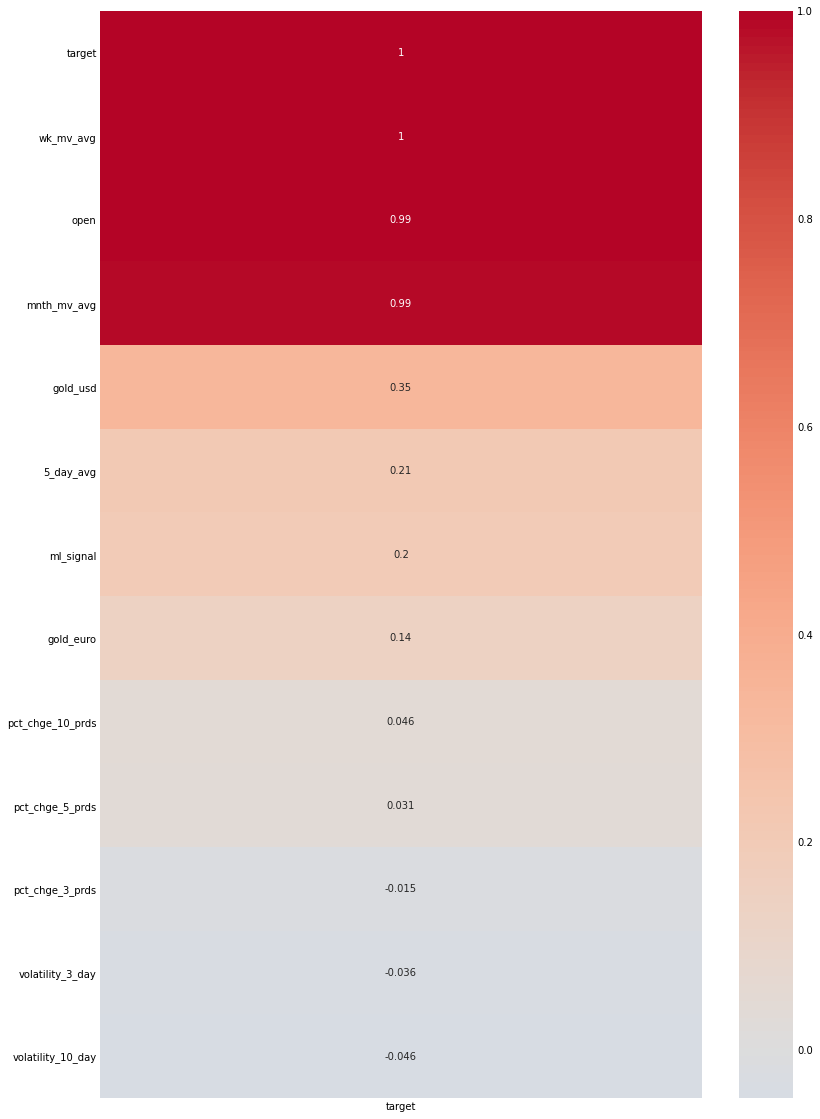

In [271]:
figure = plt.figure(figsize=(12,20))
sns.heatmap(corr_df_fr.corr()[['target']].sort_values('target',ascending=False),annot=True, cmap='coolwarm', center=0);

A lot of the features are highly correlated - I will leave them in a let ridge and lasso penalties remove the unecessary featues. I will then go back and remove my own features. 

---

## 3.1 Train/Test Split

In [272]:
## Features and scaling

In [273]:
features_fr.columns

Index(['open', 'high', 'low', 'close', 'mid', 'wk_mv_avg', 'mnth_mv_avg',
       'volatility_3_day', 'volatility_10_day', 'pct_chge_3_prds',
       'pct_chge_5_prds', 'pct_chge_10_prds', 'height', 'height-1', 'height-2',
       'height-3', 'direction', 'gold_usd', 'gold_euro', 'day-1_high',
       'day-2_high', 'day-3_high', 'day-4_high', 'day-1_low', 'day-2_low',
       'day-3_low', 'day-4_low', 'day-1_open', 'day-2_open', 'day-3_open',
       'day-4_open', 'day-1_close', 'day-2_close', 'day-3_close',
       'day-4_close', 'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close',
       'day+2_high', 'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high',
       'day+4_low', 'day+5_high', 'day+5_low', '5_day_avg', 'fractal_end',
       'day+1_frac', 'day+2_frac', 'day+3_frac', 'day+4_frac', 'select',
       'exit_price', 'target', 'date+5', 'fractal', 'ml_signal'],
      dtype='object')

In [274]:
# features_df = features.drop(['marubozu+1','day+1_open', 'day+1_high', 'day+1_low', 'day+1_close', 'day+2_high',
#        'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high', 'day+4_low',
#        'day+5_high', 'day+5_low', 'exit_price', 'select', 'date+5','target'], axis=1)

features_df_fr = features_fr.drop(['mid','height', 'height-1', 'height-2',
       'height-3', 'direction','day-1_high','day-1_close','day-1_low','day-1_open',
       'day-2_high', 'day-3_high', 'day-4_high', 'day-2_low',
       'day-3_low', 'day-4_low', 'day-2_open', 'day-3_open',
       'day-4_open', 'day-2_close', 'day-3_close',
       'day-4_close', 'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close',
       'day+2_high', 'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high',
       'day+4_low', 'day+5_high', 'day+5_low', 'fractal_end',
       'day+1_frac', 'day+2_frac', 'day+3_frac', 'day+4_frac', 'select',
       'exit_price', 'date+5', 'fractal','target'], axis=1)

In [275]:
X = features_df_fr
y = features_fr['target']

In [276]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=15)

#Standardize data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

# 3.0 Model

In [286]:
#I instantiate the various models
lr = LinearRegression()

lasso = LassoCV(n_alphas=200)

ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

enet = ElasticNetCV(l1_ratio=np.linspace(0.001, 1, 100), n_alphas = 100)

In [287]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.9936025622785785

In [288]:
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
lasso_scores.mean()

0.9930245789453565

In [289]:
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
ridge_scores.mean()

0.99338830614736

In [290]:
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=5)
enet_scores.mean()

0.9929902216803935

lasso was best, but enet should be able to be tuned to beat it or at least match it.

In [291]:
enet.fit(X_train_ss, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,...
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [292]:
enet.score(X_train_ss, y_train)

0.9938622950053597

In [293]:
enet.score(X_test_ss, y_test)

0.9948463731744758

In [294]:
yhat = enet.predict(X_test_ss)
r2_score(y_test, yhat)

0.9948463731744758

In [295]:
mse = (mean_squared_error(y_test, yhat))
print("The root mean squared error of the model is " + str(mse))

The root mean squared error of the model is 0.00012357153191568443


In [296]:
residuals = y_test - yhat

In [297]:
yhat

array([0.98676856, 1.3502241 , 1.08804096, 1.37284972, 1.09775462,
       1.21113925, 1.10570372, 1.21056477, 1.07239012, 1.13671171,
       1.29244203, 1.2218145 , 1.54671352, 1.28540161, 1.37301315,
       1.3594876 , 1.16191152, 1.23572466, 1.3476488 , 1.2860699 ,
       1.15873338, 1.37431507, 1.29703274, 1.42133311, 1.24100462,
       1.13656291, 1.3208679 , 1.11507167, 1.14231371, 1.09542562,
       1.36444164, 1.08586464, 1.56297534, 1.07483497, 1.24394034,
       1.30204704, 1.28834179, 1.21430845, 1.40976971, 1.15896431,
       1.16574519, 1.09396454, 1.27109903, 1.13614815, 1.22982991,
       1.32273562, 1.19904416, 1.34388103, 1.10398671, 1.12620109,
       1.1615102 , 1.56472768, 1.48140855, 1.26511596, 1.10056503,
       1.10910478, 0.91425059, 1.32475959, 1.16297666, 1.27646757,
       1.11814546, 1.13722713, 1.22258734, 1.26585536, 1.37175044,
       1.20708635, 1.28650918, 1.0869567 , 1.36342779, 1.22747838,
       1.06793565, 1.29945218, 1.13706813, 1.54549813, 1.20634

Text(0.5, 0, 'Predictions')

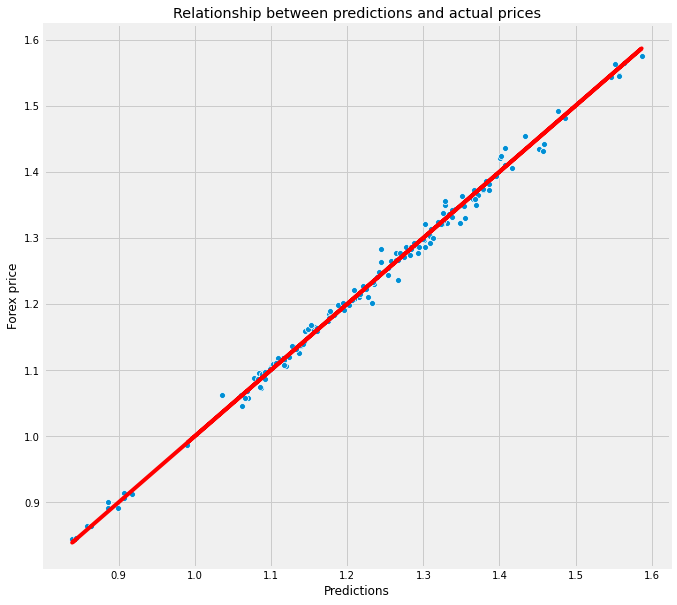

In [298]:
# Plot to show the correlation between prediction and value.
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(y_test, yhat);
ax.plot(y_test.min(), y_test.max(),
        y_test, y_test, color='r');
plt.title("Relationship between predictions and actual prices") 
plt.ylabel("Forex price")
plt.xlabel("Predictions") 

Text(0.5, 0, 'Predictions')

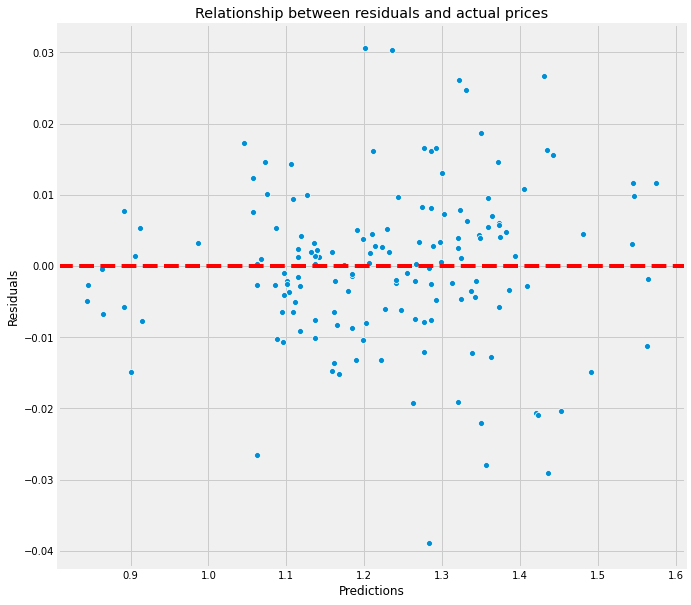

In [299]:
#plt.scatter(yhat, residuals);

f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(yhat, residuals);
ax.axhline(0, ls='--', color='r')
plt.title("Relationship between residuals and actual prices") 
plt.ylabel("Residuals")
plt.xlabel("Predictions")

## 3.2 Fit Model

In [300]:
## Interpretation

In [301]:
model_coefs = pd.DataFrame(enet.coef_, index=X.columns)

model_coefs.rename(columns={0:'coef'}, inplace=True)
model_coefs.reset_index(inplace=True)
model_coefs.sort_values('coef',ascending=False, inplace=True)
model_coefs.rename(columns={'index':'feature'}, inplace=True)
model_coefs

,feature,coef
3,close,0.075524
2,low,0.036556
1,high,0.027367
0,open,0.009266
14,ml_signal,0.008776
9,pct_chge_5_prds,0.005188
4,wk_mv_avg,0.001092
7,volatility_10_day,0.000301
10,pct_chge_10_prds,0.000071
5,mnth_mv_avg,0.000000


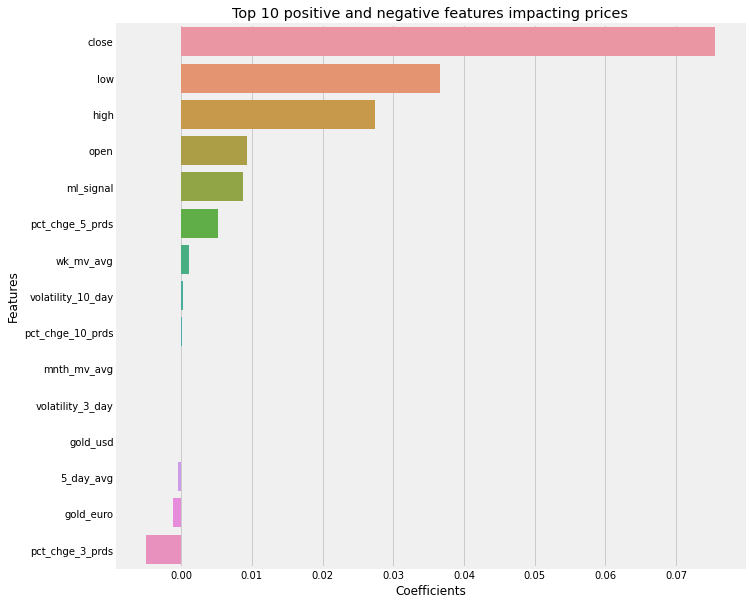

In [302]:
# Plot the graph to show top and bottom features.

f, ax = plt.subplots(figsize=(10,10))
sns.barplot(model_coefs['coef'],model_coefs['feature']);
plt.title("Top 10 positive and negative features impacting prices") 
plt.ylabel("Features")
plt.xlabel("Coefficients") ;

In [303]:
yhat

array([0.98676856, 1.3502241 , 1.08804096, 1.37284972, 1.09775462,
       1.21113925, 1.10570372, 1.21056477, 1.07239012, 1.13671171,
       1.29244203, 1.2218145 , 1.54671352, 1.28540161, 1.37301315,
       1.3594876 , 1.16191152, 1.23572466, 1.3476488 , 1.2860699 ,
       1.15873338, 1.37431507, 1.29703274, 1.42133311, 1.24100462,
       1.13656291, 1.3208679 , 1.11507167, 1.14231371, 1.09542562,
       1.36444164, 1.08586464, 1.56297534, 1.07483497, 1.24394034,
       1.30204704, 1.28834179, 1.21430845, 1.40976971, 1.15896431,
       1.16574519, 1.09396454, 1.27109903, 1.13614815, 1.22982991,
       1.32273562, 1.19904416, 1.34388103, 1.10398671, 1.12620109,
       1.1615102 , 1.56472768, 1.48140855, 1.26511596, 1.10056503,
       1.10910478, 0.91425059, 1.32475959, 1.16297666, 1.27646757,
       1.11814546, 1.13722713, 1.22258734, 1.26585536, 1.37175044,
       1.20708635, 1.28650918, 1.0869567 , 1.36342779, 1.22747838,
       1.06793565, 1.29945218, 1.13706813, 1.54549813, 1.20634

In [304]:
X_test

,open,high,low,close,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,gold_usd,gold_euro,5_day_avg,ml_signal
date,,,,,,,,,,,,,,,
2002-09-23,0.98190,0.98600,0.97540,0.97780,0.978550,0.981250,0.005596,0.005015,0.003790,0.012399,-0.002342,112.1,133.8,0.005940,0
2010-04-02,1.35660,1.35810,1.34740,1.35210,1.348760,1.356733,0.003393,0.004644,0.007551,0.011728,-0.001843,390.4,338.6,0.007080,0
2016-01-15,1.08830,1.09845,1.08608,1.08960,1.087780,1.089140,0.001291,0.003556,0.003183,-0.000418,0.001361,380.0,407.5,0.005000,0
2007-07-04,1.36160,1.36320,1.36080,1.36140,1.355050,1.344100,0.003577,0.002526,0.009491,0.012117,0.014795,227.3,195.9,0.005000,1
2016-01-22,1.08342,1.08628,1.07882,1.08110,1.088396,1.088444,0.002859,0.002760,-0.008992,-0.006144,-0.006559,380.9,413.2,0.005000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-08-03,1.20300,1.20770,1.19960,1.20330,1.205130,1.225683,0.000589,0.002132,-0.002032,-0.006318,-0.027718,135.8,132.2,0.005000,0
2009-10-20,1.49730,1.49900,1.48820,1.49230,1.492810,1.474362,0.002185,0.002801,0.000435,0.008127,0.016560,368.9,289.9,0.005580,0
2004-12-17,1.32640,1.33410,1.32290,1.33240,1.331500,1.326438,0.004010,0.003616,-0.000414,0.002980,-0.005387,152.5,135.1,0.006720,0


In [305]:
## Confusion Matrix

In [306]:
final_res_enet = X_test
final_res_enet['yhat'] = yhat
final_res_enet

,open,high,low,close,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,gold_usd,gold_euro,5_day_avg,ml_signal,yhat
date,,,,,,,,,,,,,,,,
2002-09-23,0.98190,0.98600,0.97540,0.97780,0.978550,0.981250,0.005596,0.005015,0.003790,0.012399,-0.002342,112.1,133.8,0.005940,0,0.986769
2010-04-02,1.35660,1.35810,1.34740,1.35210,1.348760,1.356733,0.003393,0.004644,0.007551,0.011728,-0.001843,390.4,338.6,0.007080,0,1.350224
2016-01-15,1.08830,1.09845,1.08608,1.08960,1.087780,1.089140,0.001291,0.003556,0.003183,-0.000418,0.001361,380.0,407.5,0.005000,0,1.088041
2007-07-04,1.36160,1.36320,1.36080,1.36140,1.355050,1.344100,0.003577,0.002526,0.009491,0.012117,0.014795,227.3,195.9,0.005000,1,1.372850
2016-01-22,1.08342,1.08628,1.07882,1.08110,1.088396,1.088444,0.002859,0.002760,-0.008992,-0.006144,-0.006559,380.9,413.2,0.005000,1,1.097755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-08-03,1.20300,1.20770,1.19960,1.20330,1.205130,1.225683,0.000589,0.002132,-0.002032,-0.006318,-0.027718,135.8,132.2,0.005000,0,1.201452
2009-10-20,1.49730,1.49900,1.48820,1.49230,1.492810,1.474362,0.002185,0.002801,0.000435,0.008127,0.016560,368.9,289.9,0.005580,0,1.491893
2004-12-17,1.32640,1.33410,1.32290,1.33240,1.331500,1.326438,0.004010,0.003616,-0.000414,0.002980,-0.005387,152.5,135.1,0.006720,0,1.330305


In [307]:
yhat

array([0.98676856, 1.3502241 , 1.08804096, 1.37284972, 1.09775462,
       1.21113925, 1.10570372, 1.21056477, 1.07239012, 1.13671171,
       1.29244203, 1.2218145 , 1.54671352, 1.28540161, 1.37301315,
       1.3594876 , 1.16191152, 1.23572466, 1.3476488 , 1.2860699 ,
       1.15873338, 1.37431507, 1.29703274, 1.42133311, 1.24100462,
       1.13656291, 1.3208679 , 1.11507167, 1.14231371, 1.09542562,
       1.36444164, 1.08586464, 1.56297534, 1.07483497, 1.24394034,
       1.30204704, 1.28834179, 1.21430845, 1.40976971, 1.15896431,
       1.16574519, 1.09396454, 1.27109903, 1.13614815, 1.22982991,
       1.32273562, 1.19904416, 1.34388103, 1.10398671, 1.12620109,
       1.1615102 , 1.56472768, 1.48140855, 1.26511596, 1.10056503,
       1.10910478, 0.91425059, 1.32475959, 1.16297666, 1.27646757,
       1.11814546, 1.13722713, 1.22258734, 1.26585536, 1.37175044,
       1.20708635, 1.28650918, 1.0869567 , 1.36342779, 1.22747838,
       1.06793565, 1.29945218, 1.13706813, 1.54549813, 1.20634

In [308]:
final_res_enet.sort_index(inplace=True)
final_res_enet[['open','high','low','close','yhat']].head()

,open,high,low,close,yhat
date,,,,,
2000-08-22,0.9024,0.9035,0.8933,0.8936,0.906124
2000-09-29,0.8813,0.8852,0.8752,0.8828,0.891801
2000-10-13,0.8627,0.8660,0.8530,0.8554,0.864593
2000-10-30,0.8414,0.8530,0.8396,0.8410,0.843707
2000-11-14,0.8593,0.8618,0.8549,0.8588,0.863879


In [309]:
result_dates = final_res_enet.index

In [330]:
prepare_res = features_fr.drop(['mid', 'height-1', 'height-2',
       'height-3','day-1_high','day-1_close','day-1_low','day-1_open',
       'day-2_high', 'day-3_high', 'day-4_high', 'day-2_low',
       'day-3_low', 'day-4_low', 'day-2_open', 'day-3_open',
       'day-4_open', 'day-2_close', 'day-3_close',
       'day-4_close', 'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close',
       'day+2_high', 'day+2_low', 'day+3_high', 'day+3_low', 'day+4_high',
       'day+4_low', 'day+5_high', 'day+5_low', 'fractal_end',
       'day+1_frac', 'day+2_frac', 'day+3_frac', 'day+4_frac', 'select',
       'date+5', 'fractal'], axis=1)

In [331]:
create_cm_df = prepare_res.loc[prepare_res.index.isin(result_dates)]
create_cm_df

,open,high,low,close,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,direction,gold_usd,gold_euro,5_day_avg,exit_price,target,ml_signal
date,,,,,,,,,,,,,,,,,,,
2000-08-22,0.90240,0.90350,0.89330,0.89360,0.909270,0.915057,0.002085,0.005123,-0.019383,-0.014703,-0.007406,0.00880,1,95.0,124.2,0.00500,0.89860,0.90750,0
2000-09-29,0.88130,0.88520,0.87520,0.88280,0.881080,0.871436,0.003206,0.007613,0.003413,0.013152,0.025938,0.00150,1,95.1,126.5,0.00500,0.88780,0.88610,0
2000-10-13,0.86270,0.86600,0.85300,0.85540,0.866850,0.869279,0.003811,0.002683,-0.013210,-0.012529,-0.026076,0.00730,1,94.9,129.7,0.00500,0.86040,0.85790,0
2000-10-30,0.84140,0.85300,0.83960,0.84100,0.835060,0.855376,0.006930,0.005071,0.010329,0.003280,-0.012908,0.00040,-1,92.0,127.8,0.00500,0.83600,0.83880,0
2000-11-14,0.85930,0.86180,0.85490,0.85880,0.861080,0.850186,0.004923,0.005282,-0.002439,-0.003769,0.017289,0.00050,1,92.1,126.0,0.00516,0.86396,0.86340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-29,1.11288,1.11509,1.11128,1.11429,1.114514,1.122822,0.000298,0.001739,-0.000332,-0.006296,-0.011552,0.00141,-1,493.1,520.2,0.00500,1.10929,1.10268,0
2019-09-05,1.10271,1.10847,1.10166,1.10343,1.099355,1.109275,0.002465,0.003056,0.006189,-0.003032,-0.004211,0.00072,-1,531.3,565.0,0.00500,1.09843,1.09268,0
2019-10-23,1.11174,1.11417,1.11061,1.11360,1.113209,1.101397,0.001446,0.001922,-0.001512,0.006568,0.013730,0.00186,1,519.3,548.6,0.00500,1.11860,1.11704,0


In [332]:
create_cm_df.columns

Index(['open', 'high', 'low', 'close', 'wk_mv_avg', 'mnth_mv_avg',
       'volatility_3_day', 'volatility_10_day', 'pct_chge_3_prds',
       'pct_chge_5_prds', 'pct_chge_10_prds', 'height', 'direction',
       'gold_usd', 'gold_euro', '5_day_avg', 'exit_price', 'target',
       'ml_signal'],
      dtype='object')

In [333]:
create_cm_df['yhat'] = final_res_enet[['yhat']]
create_cm_df.rename(columns={'exit_price':'threshold','target':'actual_best'}, inplace=True)

# X_test['exit_price'] = 
#exit_price

In [334]:
def classify_row(row):
    
    if row['direction'] == -1:
        if row['actual_best'] <= row['threshold']:
            return 1
        else:
            return 0
    elif row['direction'] == 1:
        if row['actual_best'] >= row['threshold']:
            return 1
        else:
            return 0

In [335]:
def classify_mlr(row):
    
    if row['direction'] == -1:
        if row['yhat'] <= row['threshold']:
            return 1
        else:
            return 0
    elif row['direction'] == 1:
        if row['yhat'] >= row['threshold']:
            return 1
        else:
            return 0

In [336]:
create_cm_df['correct_decision'] = create_cm_df.apply(classify_row, axis=1)

In [337]:
create_cm_df['ml_decision'] = create_cm_df.apply(classify_mlr, axis=1)

In [338]:
create_cm_df

,open,high,low,close,wk_mv_avg,mnth_mv_avg,volatility_3_day,volatility_10_day,pct_chge_3_prds,pct_chge_5_prds,pct_chge_10_prds,height,direction,gold_usd,gold_euro,5_day_avg,threshold,actual_best,ml_signal,yhat,correct_decision,ml_decision
date,,,,,,,,,,,,,,,,,,,,,,
2000-08-22,0.90240,0.90350,0.89330,0.89360,0.909270,0.915057,0.002085,0.005123,-0.019383,-0.014703,-0.007406,0.00880,1,95.0,124.2,0.00500,0.89860,0.90750,0,0.906124,1,1
2000-09-29,0.88130,0.88520,0.87520,0.88280,0.881080,0.871436,0.003206,0.007613,0.003413,0.013152,0.025938,0.00150,1,95.1,126.5,0.00500,0.88780,0.88610,0,0.891801,0,1
2000-10-13,0.86270,0.86600,0.85300,0.85540,0.866850,0.869279,0.003811,0.002683,-0.013210,-0.012529,-0.026076,0.00730,1,94.9,129.7,0.00500,0.86040,0.85790,0,0.864593,0,1
2000-10-30,0.84140,0.85300,0.83960,0.84100,0.835060,0.855376,0.006930,0.005071,0.010329,0.003280,-0.012908,0.00040,-1,92.0,127.8,0.00500,0.83600,0.83880,0,0.843707,0,0
2000-11-14,0.85930,0.86180,0.85490,0.85880,0.861080,0.850186,0.004923,0.005282,-0.002439,-0.003769,0.017289,0.00050,1,92.1,126.0,0.00516,0.86396,0.86340,0,0.863879,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-29,1.11288,1.11509,1.11128,1.11429,1.114514,1.122822,0.000298,0.001739,-0.000332,-0.006296,-0.011552,0.00141,-1,493.1,520.2,0.00500,1.10929,1.10268,0,1.109105,1,1
2019-09-05,1.10271,1.10847,1.10166,1.10343,1.099355,1.109275,0.002465,0.003056,0.006189,-0.003032,-0.004211,0.00072,-1,531.3,565.0,0.00500,1.09843,1.09268,0,1.096818,1,1
2019-10-23,1.11174,1.11417,1.11061,1.11360,1.113209,1.101397,0.001446,0.001922,-0.001512,0.006568,0.013730,0.00186,1,519.3,548.6,0.00500,1.11860,1.11704,0,1.115738,0,0


In [339]:
def clasify_cm(row):
    if row['correct_decision'] == 1 and row['ml_decision'] ==1:
        return 'tp'
    elif row['correct_decision'] == 0 and row['ml_decision'] == 0:
        return 'tn'
    elif row['correct_decision'] == 0 and row['ml_decision'] == 1:
        return 'fp'
    elif row['correct_decision'] == 1 and row['ml_decision'] == 0:
        return 'fn'

In [356]:
create_cm_df['outcome'] = create_cm_df.apply(clasify_cm, axis=1)
create_cm_df[['open','high','low','close','5_day_avg','threshold','actual_best','ml_signal',
              'yhat','correct_decision','ml_decision','direction','outcome']].head(20)

,open,high,low,close,5_day_avg,threshold,actual_best,ml_signal,yhat,correct_decision,ml_decision,direction,outcome
date,,,,,,,,,,,,,
2000-08-22,0.9024,0.9035,0.8933,0.8936,0.00500,0.89860,0.9075,0,0.906124,1,1,1,tp
2000-09-29,0.8813,0.8852,0.8752,0.8828,0.00500,0.88780,0.8861,0,0.891801,0,1,1,fp
2000-10-13,0.8627,0.8660,0.8530,0.8554,0.00500,0.86040,0.8579,0,0.864593,0,1,1,fp
2000-10-30,0.8414,0.8530,0.8396,0.8410,0.00500,0.83600,0.8388,0,0.843707,0,0,-1,tn
2000-11-14,0.8593,0.8618,0.8549,0.8588,0.00516,0.86396,0.8634,0,0.863879,0,0,1,tn
2001-03-22,0.8965,0.8969,0.8833,0.8872,0.00730,0.89450,0.8993,0,0.891614,1,0,1,fn
2001-04-26,0.8968,0.9050,0.8950,0.9047,0.00764,0.89706,0.8854,-1,0.900296,1,0,-1,fn
2001-06-22,0.8537,0.8605,0.8515,0.8600,0.00500,0.85500,0.8434,-1,0.846041,1,1,-1,tp
2001-09-04,0.9065,0.9066,0.8847,0.8871,0.00920,0.89630,0.9177,1,0.912408,1,1,1,tp


In [341]:
def create_cm(enet_res):
    
    res_cm = [[0,0],
              [0,0]]
    
    for res in enet_res:
        if res == 'tp':
            res_cm[0][0] += 1
        elif res == 'fp':
            res_cm[0][1] += 1
        elif res == 'fn':
            res_cm[1][0] += 1
        elif res == 'tn':
            res_cm[1][1] += 1
    
    return res_cm

In [342]:
cm = create_cm(create_cm_df['outcome'])

In [343]:
cm_df = pd.DataFrame(cm, index=['pred_success', 'pred_non_success'], columns=['actual success', 'actual non_success'])
cm_df

,actual success,actual non_success
pred_success,76,14
pred_non_success,29,34


In [344]:
def print_metrics(cm):
    # Accuracy - how many did the model get right
    # Total number of correct predictions / total number of predictions
    acc= (cm[0][0]+cm[1][1])/(np.sum(cm))
    
    # Precision proportion of positive identifications that were actually correct
    # True positives/ true positives + false positives)
    prec = cm[0][0]/(cm[0][0]+cm[0][1])
    
    # Recall - proportion of actual positives that were correctly defined
    # True positives/ true positives + false negatives
    rec = cm[0][0]/(cm[0][0]+cm[1][0])

    print(f"Accuracy:\t{round(acc,2)}\nPrecision:\t{round(prec,2)}\nRecall:\t\t{round(rec,2)}")


In [345]:
# Display the results
print_metrics(cm)

Accuracy:	0.72
Precision:	0.84
Recall:		0.72
